Import all relevant libraries

In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [16]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)
iex_key = 'pk_32af36dd64e047e7a64c8f9a3f2b6267'
alpha_vantage_key =  'YVW7BSHF8MTGR4JD'

Read historical Finncial Data for companies using TIckers as variable names; Bank of America (BAC), Citi Group (C), Goldman Sachs (GS), JP Morgan (JPM), Morgan Stanley (MS), Well Fargo (WFC)

In [21]:
# Bank of America 
BAC = data.DataReader('BAC','av-daily',start,end,api_key=alpha_vantage_key)

# CitiGroup
C = data.DataReader('C','av-daily',start,end,api_key=alpha_vantage_key)

# Goldman Sachs
GS = data.DataReader('GS','av-daily',start,end,api_key=alpha_vantage_key)

# JP Morgan Chase
JPM = data.DataReader('JPM','av-daily',start,end,api_key=alpha_vantage_key)

# Morgan Stanley
MS = data.DataReader('MS','av-daily',start,end,api_key=alpha_vantage_key)


In [22]:
# Wells Fargo
WFC = data.DataReader('WFC','av-daily',start,end,api_key=alpha_vantage_key)

In [31]:
tickers = ['BAC','C','GS','JPM','MS','WFC']


In [32]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [35]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [36]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    open   high    low  close    volume   open   high    low  close   
2006-01-03   46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04   47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05   46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06   46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09   46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   

Bank Ticker            ...     MS                                    WFC  \
Stock Info     volume  ...   open   high      low  close   volume   open   
2006-01-03   15376000  ...  57.17  58.49  56.7400  58.31  5377000  63.20   
2006-01-04   18709000  ...  58.70  59.28  58.3500  58.35  7977800  63.60   
2006-01-05   11431000  ...  58.55  58.59  58.0200  58.51  5778000  63.00   
2006-01-06   13702000  ...  58.77  58.85  58.0500  58.57  6889800  63.16   
2006-01-09   16807000  ...  58.63  59.29  58.6244  59.19  4144500  63.35   

Bank Ticker                                
Stock Info    high    low  close   volume  
2006-01-03   63.95  62.39  63.80  5508200  
2006-01-04   63.64  62.73  63.06  5435000  
2006-01-05   63.11  62.62  62.99  5079000  
2006-01-06   63.55  62.77  63.36  4201900  
2006-01-09   63.65  63.11  63.35  2809800  

[5 rows x 30 columns]

In [53]:
bank_stocks.xs(key='close',axis=1,level=1).max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

In [54]:
returns = pd.DataFrame()

In [57]:
for tick in tickers:
    returns[tick+' Returns'] = bank_stocks[tick]['close'].pct_change()
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


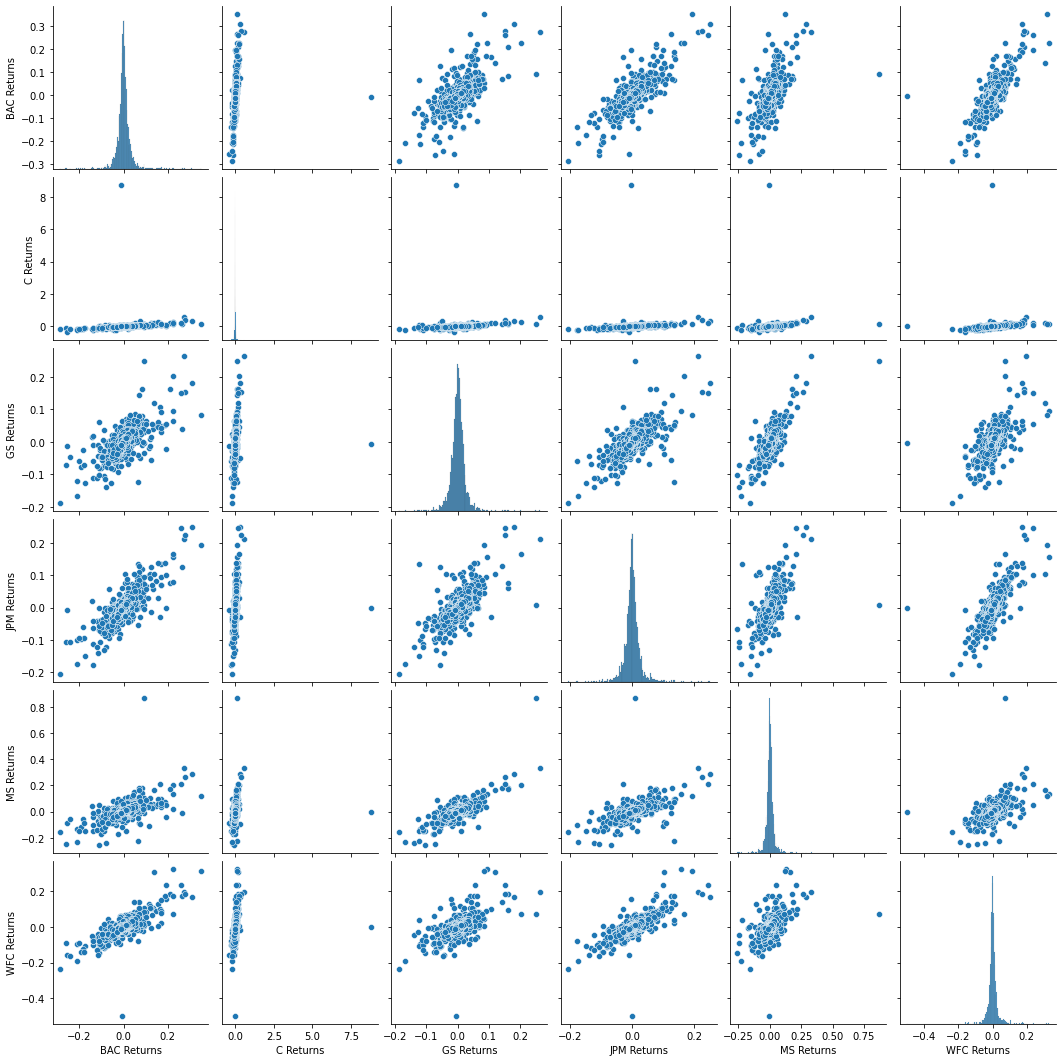

In [59]:
import seaborn as sns
sns.pairplot(returns)